This notebook starts with the same basic circle-and-square example as `circle_and_square.py` (adapted slightly to follow some of my preferred notebook idioms, e.g. constructing groups through parameterized functions to avoid cluttering the top-level namespace, and constructing complex groups out of simple ones after constructing the simple ones in isolation). After this, a few other variations on the theme are presented.

In [1]:
from obsidian import Canvas, Group, EQ
from obsidian.geometry import Circle, Rectangle, Point
from obsidian.canvas import render

In [2]:
SQRT_2 = 2**0.5

WIDTH = HEIGHT = 300

CIRCLE_STYLE = {"stroke": "#0000ff", "fill_opacity": "0"}
RECT_STYLE = {"stroke": "#ff0000", "fill_opacity": "0"}

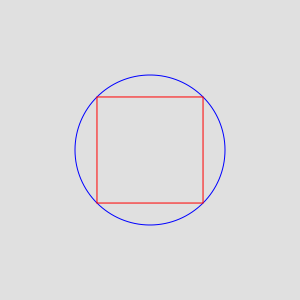

In [3]:
def make_basic_group(r):
    circle = Circle(style=CIRCLE_STYLE)
    square = Rectangle(style=RECT_STYLE)
    shapes = {'circle': circle, 'square': square}
    constraints = [
        circle.center |EQ| square.center,
        circle.radius |EQ| r,
        square.width |EQ| square.height,
        square.width |EQ| circle.radius * SQRT_2
    ]
    return Group(shapes, constraints)

circle_and_square = make_basic_group(r=WIDTH/4)
render(circle_and_square, width=WIDTH, height=HEIGHT, bg_color="#e0e0e0")

In [4]:
# After we've created this group we can reference its named members by name:
circle_and_square['circle']

Circle(x=FV0, y=FV1, radius=FV2, style={'stroke': '#0000ff', 'fill_opacity': '0'})

In [5]:
# We can also iterate over the group's named members just like we'd iterate through a dictionary:
[t for t in circle_and_square.items()]

[('circle',
  Circle(x=FV0, y=FV1, radius=FV2, style={'stroke': '#0000ff', 'fill_opacity': '0'})),
 ('square',
  Rectangle(x=FV3, y=FV4, width=FV5, height=FV6, style={'stroke': '#ff0000', 'fill_opacity': '0'}))]

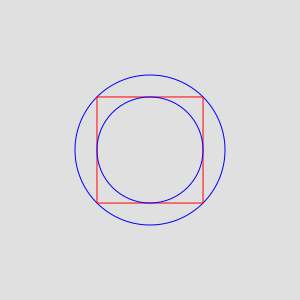

In [6]:
# This shows how new shapes can easily be composed with existing groups.

# In this example, we create a new figure that expands on the above figure by adding a second circle
# inscribed within the first figure's inner square.

# This also shows a different style for defining shape parameters. By specifiying x,y,r explicitly in
# terms of existing free variables, we avoid having to create any new free variables or constraints.

def make_group_with_extra_circle():
    g = make_basic_group(WIDTH/4)

    circle_2 = Circle(
        x=g.center.x,
        y=g.center.y,
        radius=g['square'].width / 2,
        style=CIRCLE_STYLE
    )
    return Group([g, circle_2])

render(make_group_with_extra_circle(), width=WIDTH, height=HEIGHT, bg_color="#e0e0e0")

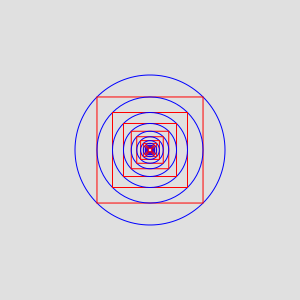

In [7]:
# Here's another example of how new groups might be added onto existing ones.

def make_nested_group():
    g = make_basic_group(WIDTH/4)
    groups = [g]

    for _ in range(10):
        g = make_basic_group(g['square'].width / 2)
        groups.append(g)

    constraints = [g1.center |EQ| g2.center for g1, g2 in zip(groups, groups[1:])]
    return Group(groups, constraints)

render(make_nested_group(), width=WIDTH, height=HEIGHT, bg_color="#e0e0e0")

In [8]:
# TODO: add "infinite zoom" example after keyframe animations are implemented